# POLSCI 3

## Week 3, Notebook Lecture 1: Average and standard deviation

### Goals of the Notebook Lectures this week

Last week you learned some important tools for summarizing data in R.  

- For categorical variables with a small number of categories, you learned to create **one-way** and **two-way tables**. 

- And for continuous variables or those with many categories, you used **histograms** and **scatterplots**. 

One-way tables and histograms allow you to study the distribution of the values of a single variable. Two-way tables and scatterplots, however, tell us something about the **association** between two variables. Studying associations is an important part of answering the kinds of questions we will ask in this course.

- Remember: associations may or may not be evidence of a causal relationship between variables---as we'll discuss more next week! 
But learning to analyze associations is an important tool for data analysis, whether causality is in the picture or not.

In the recorded lecture this week, we'll look at an additional tool for summarizing the association between two variables: the **correlation coefficient**.  

The correlation coefficient can be a useful measure of association (though I will also talk in the recording about cases where it is not useful, or can even be misleading).  We will use the correlation coefficient again later in the semester, when we study bivariate regression.

In order to get ready to understand correlation, we will first need to study two other important concepts using R: the **average** and the **standard deviation** of a variable.  We'll also learn what it means to **standardize** a variable.  

That's what we'll do in this lecture, and then you'll be ready to learn about the correlation coefficient using R in the recorded lecture.

### Motivation: why the correlation coefficient?

Before we get to calculations, let's talk about why the correlation coefficient can be a useful measure.

Let's keep working with our Polity and Happiness data from last week.  To use the data, we have to read the data into memory. So like in Week 2, let's load it into a dataset called <code>happiness_data</code>:


In [2]:
happiness_data <- read.csv('happiness_polity_2018.csv')
head(happiness_data)

,countryname,polity2,polity2_cat,gdpcapita,gdpcapita_cat,happiness,happiness_cat,life_expectancy,life_expectancy_cat
,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Afghanistan,-1,anocracies,2190.751,low-income,2.694,least happy,52.6,shortest lives
2,Albania,9,democracies,13602.374,middle-income,5.004,middle happiness,68.7,middle
3,Algeria,2,anocracies,11475.844,middle-income,5.043,middle happiness,65.9,middle
4,Argentina,9,democracies,22742.701,middle-income,5.793,middle happiness,68.8,middle
5,Armenia,7,democracies,12720.883,middle-income,5.062,middle happiness,66.9,middle
6,Australia,10,democracies,49563.000,rich,7.177,most happy,73.6,longest lives


Last week, you learned to produce a scatterplot using the<code>plot()</code>function in R.  So, let's consider the scatterplot of happiness against life expectancy.  Remember the definitions of these variables (I didn't print the whole codebook today since we'll just be using these two variables):

<code>happiness</code>: The country's happiness index, measured through surveys that require participants to evaluate their quality of life on a scale (or "ladder") from 0-10.

<code>life_expectancy</code>: Average life expectancy in years

Here is the scatterplot, with some extra labels for the title and the horizontal ("x") and vertical ("y") axes:

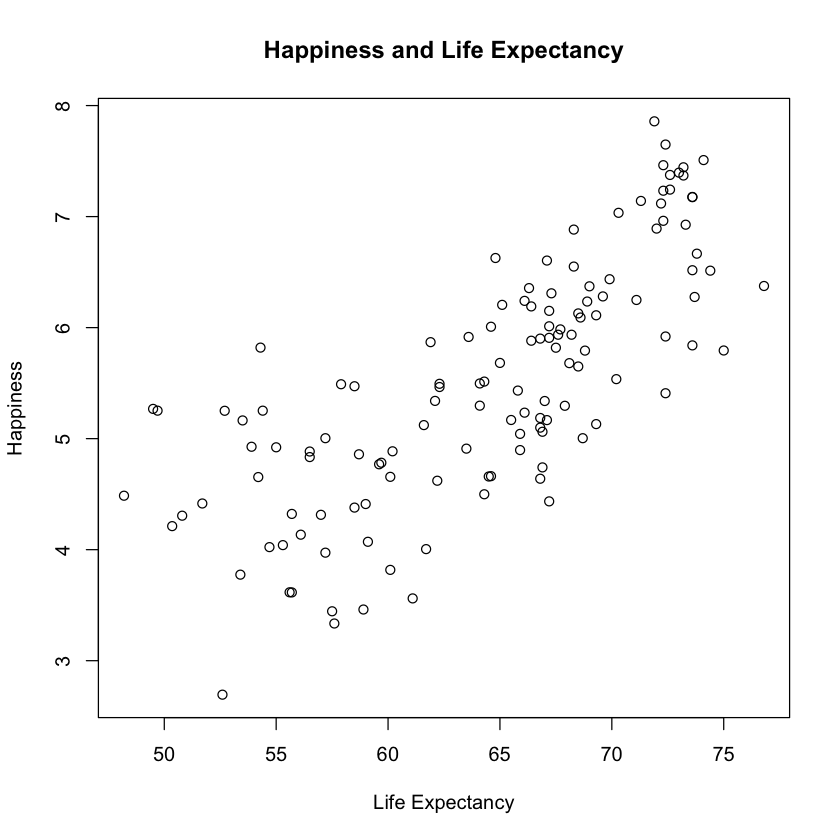

In [3]:
plot(happiness_data$life_expectancy, happiness_data$happiness, main="Happiness and Life Expectancy", xlab="Life Expectancy",ylab="Happiness")

It definitely looks like there is a **positive association** between happiness and life expectancy!  Where life expectancy is large, so is happiness; and vice versa...

But how strong is this association?  Is there as single number that we could use as a summary?

This is where the **correlation coefficient** can come in.

To understand the correlation coefficient, we first need to understand (and be able to produce in R!) the **average** and the **standard deviation** of a variable. 

### The average

We've already worked with calculating the average in R using the<code>mean()</code>function.  ("Mean" is a synonym for "average").  The average is the sum of all the numbers in a list, divided by the number of entries.  Here by "list" we mean any column of the dataset---that is, any variable.

Let's use<code>mean()</code>to create and store the average of life expectancy in a variable called<code>ave_life_expectancy</code>:

In [4]:
ave_life_expectancy <- mean(happiness_data$life_expectancy)
ave_life_expectancy

[1] 64.45384

And let's do the same for the average of happiness, assigning it to a variable called<code>ave_happiness</code>:

In [5]:
ave_happiness <- mean(happiness_data$happiness)
ave_happiness

[1] 5.513916

On average in our countries, the average life expectancy is about 64.5 years, and the average happiness (life evaluation) is about 5.5.

## The standard deviation

A second concept we will need to calculate the correlation coefficient is the **standard deviation."  We'll also use this idea in various ways throughout the class.  

The standard deviation is a measure of "spread".  It measures how far from the average of a list a "typical" entry on the list.  For example, if our variable is <code>life expectancy</code>, measured for each country in years, the standard deviation tells us about how far from the average of 64.5 years we might expect a typical country to be.

To calculate the **standard deviation** of a variable, we follow the following steps:
- Calculate the average of the variable;
- Take the difference between the value of the variable for each unit and the average. (That is, take the difference between the number in each cell in a column and the overall average of the column).
- Square each difference so that it is a positive number;
- Add up all the differences and divide by the number of differences---to get the average squared difference.
- Take the square root of the average.

Note: these steps are sometimes referred to as taking the **"root-mean-squared"** difference -- because, exactly as the label suggests, we have to take (1) the square of each difference from average; then (2) the average of all the differences; and finally (3) the square root of the average. Reading from right to left, we have squared difference, then the mean, then the square root....  Not at all confusing once you get used to it! :) 

Let's look at some examples. The life expectancy in **Afghanistan** in 2018 was 52.6 years:

In [6]:
afghanistan <- subset(happiness_data, countryname=="Afghanistan")
afghanistan$life_expectancy

[1] 52.6

So Afghanistan's difference from average life expectancy, which we saw above was 64.5, is about -11.9:

In [7]:
afghan_diff <- afghanistan$life_expectancy - ave_life_expectancy
afghan_diff 

[1] -11.85384

That is, life expectancy in Afghanistan is about 11.9 years lower than the average life expectancy across all countries in the dataset. 

Thus, the squared difference, that is, (-11.9)*(-11.9), is about 140.5:

In [8]:
afghan_diff^2 

[1] 140.5136

(Remember that<code>afghan_diff</code>is just a number, so we can take its square using R as a calculator! The syntax for taking the square of any<code>**number**</code>is just<code>**number**^2</code>).

Another example is **Norway**, where the life expectancy in 2018 was about 73.2 years,

In [9]:
norway <- subset(happiness_data, countryname=="Norway")
norway$life_expectancy

[1] 73.2

yielding Norway's difference from average of about 8.8 years,

In [10]:
norway_diff <- norway$life_expectancy - ave_life_expectancy
norway_diff

[1] 8.746157

and a squared difference of about 76.5:

In [11]:
norway_diff^2 

[1] 76.49527

Now, we can 

- add up all the squared differences... for Afghanistan, Norway, South Africa, the United States, etc...
- take the average of the squared differences; and then
- take the square root of the average.

This involves some calculating... True, R makes this pretty fast, so it might not be such a pain.  

Fortunately, though, we can simply use the<code>sd()</code>function in R ---where "sd" stands for "standard deviation"---to do this calculation for us!

Let's try it:


In [12]:
sd_life_expectancy <- sd(happiness_data$life_expectancy)
sd_life_expectancy

[1] 6.845486

So, we now have a measure of the "typical" difference of any country from the average life expectancy of 64.5: it is about 6.9 years. 

For many lists of numbers (but not all!), about 68% or 2 in 3 of the numbers are within 1 standard deviation of average, i.e., no more than 1 standard deviation above or below the mean.  The other 32% are further away from average.  And about 95% of the numbers, or 19 out of 20, are within 2 standard deviations of average, the other 5% are further away.  This is true when the numbers follow a *normal distribution,* i.e., a bell-shaped curve. We'll talk more about this idea later in the class.

A minor side note: by default, to get the average of the squared differences, the R function<code>sd()</code>divides by the number of units minus 1, rather than simply the number of units. For example, here the units are countries, and there there are 131 countries in the data set; thus, when you use<code>sd()</code>, R divides the sum of the squared differences from average by 130, not 131. This is because sometimes in statistics dividing by $n-1$ rather than $n$ (where $n$ is the number of entries on a list) is the right thing to do. But it's not the right thing to do here.  

We could correct this, but we won't worry about it right now; the difference between dividing by 130 instead of 131 is no big deal....

### Standardizing a variable

The final thing we will need before learning to calculate the correlation coefficient is to understand how to standardize a variable---that is, to measure it in **standard units**. 

As we will see, this means that we measure the value of a variable in terms of the number of standard deviations each unit is above or below the average.

Thus, to standardize a variable, we 
- subtract the average; and
- divide by the standard deviation.

For example, for Afghanistan, we have the following.  Remember that we already calculated the difference between Afghanistan's life expectancy and average life expectancy among countries in the dataset:


In [13]:
afghan_diff

[1] -11.85384

We also just calculated the standard deviation:

In [14]:
sd_life_expectancy

[1] 6.845486

Thus, Afghanistan's life expectancy is 1.73 standard deviations below average:

In [15]:
afghanistan_standardized_life_expectancy <- afghan_diff /sd_life_expectancy
afghanistan_standardized_life_expectancy

[1] -1.731629

In Norway, on the other hand, the difference from average life expectancy is about 8.8 years:

In [16]:
norway_diff

[1] 8.746157

Thus, Norway's life expectancy is about 1.28 standard deviations above average. 

In [17]:
norway_standardized_life_expectancy <- norway_diff /sd_life_expectancy
norway_standardized_life_expectancy

[1] 1.277653

It turns out that the average of any variable, when converted to standard units, is 0 (because the average of the deviations from zero is zero); and the standard deviation is 1. We don't need to linger on this fact now; but I just wanted to point it out.

Now, we are ready to understand and calculate the correlation coefficient!  This is the topic of the recorded lecture, which you should watch before Thursday's class.  

In class on Thursday, you will be using your new knowledge to calculate averages, standard deviations, and correlations and to answer some questions about these concepts.

### Further reading

This Notebook Lecture 1 and the recorded Notebook Lecture 2 are self-contained (meaning, I believe you can follow them even if you have never before encountered the standard deviations or correlations!).

However, some of you might find further reading useful.  Therefore I put the following **chapters on bCourses** as optional reading. For the material covered today, read this chapter:

Freedman, David, Robert Pisani, and Roger Purves. 2007. *Statistics*  New York: W.W. Norton & Company, Fourth Edition. Chapter Four ("The Average and the Standard Deviation."

And for the recorded lecture, read this chapter:

Freedman, David, Robert Pisani, and Roger Purves. 2007. *Statistics*  New York: W.W. Norton & Company, Fourth Edition. Chapter Eight ("Correlation")


## Review

Today you learned the following:
- How to calculate the average of a variable using the <code>mean()</code> function (this was review);
- How to interpret the standard deviation of a variable and how to calculate it using the <code>sd()</code> function; and
- What it means to standardize a variable, that is, to create a measure of how above or below average a given unit (e.g. country) is on a given variable in terms of standard deviations.

Now you are ready to learn about the correlation coefficient in the recorded lecture!


## Recorded lecture -- watch before Thursday's class!

Remember to watch the recorded lecture before Thursday's class so that you are ready to practice your new skills during Thursday's in-class assignment.
